In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Baca data dari file CSV
installments_data = pd.read_csv('/content/drive/MyDrive/home-credit-default-risk/installments_payments.csv')

print(installments_data)

          SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
0            1054186      161674                     1.0   
1            1330831      151639                     0.0   
2            2085231      193053                     2.0   
3            2452527      199697                     1.0   
4            2714724      167756                     1.0   
...              ...         ...                     ...   
13605396     2186857      428057                     0.0   
13605397     1310347      414406                     0.0   
13605398     1308766      402199                     0.0   
13605399     1062206      409297                     0.0   
13605400     2448869      434321                     1.0   

          NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
0                             6          -1180.0             -1187.0   
1                            34          -2156.0             -2156.0   
2                             1            -63.0               

In [4]:
installments_data.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [5]:
installments_data.tail()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN
13605400,2448869,434321,1.0,19,-27.0,NaN,11504.250,NaN


In [6]:
# Tampilkan informasi umum tentang data
print("Info sebelum data cleaning:")
print(installments_data.info())

Info sebelum data cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


In [7]:
# Handling missing values
installments_data.fillna(0, inplace=True)  # Menggantikan nilai-nilai yang hilang dengan 0

# Mengonversi kolom DAYS_INSTALMENT dan DAYS_ENTRY_PAYMENT ke dalam format tanggal
installments_data['DAYS_INSTALMENT'] = pd.to_datetime(installments_data['DAYS_INSTALMENT'], errors='coerce')
installments_data['DAYS_ENTRY_PAYMENT'] = pd.to_datetime(installments_data['DAYS_ENTRY_PAYMENT'], errors='coerce')

# Membuang baris dengan nilai-nilai yang tidak valid atau tidak masuk akal
installments_data.dropna(subset=['DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT'], inplace=True)

# Membuang baris dengan nilai-nilai negatif pada kolom yang tidak semestinya
installments_data = installments_data[(installments_data['AMT_INSTALMENT'] >= 0) & (installments_data['AMT_PAYMENT'] >= 0)]

In [8]:
# Tampilkan informasi umum setelah data cleaning
print("\nInfo setelah data cleaning:")
print(installments_data.info())


Info setelah data cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   SK_ID_PREV              int64         
 1   SK_ID_CURR              int64         
 2   NUM_INSTALMENT_VERSION  float64       
 3   NUM_INSTALMENT_NUMBER   int64         
 4   DAYS_INSTALMENT         datetime64[ns]
 5   DAYS_ENTRY_PAYMENT      datetime64[ns]
 6   AMT_INSTALMENT          float64       
 7   AMT_PAYMENT             float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 934.2 MB
None


In [9]:
# Proses Data untuk Analisis
installments_data['AMT_DIFF'] = installments_data['AMT_INSTALMENT'] - installments_data['AMT_PAYMENT']
installments_data['CONSISTENCY_PERCENTAGE'] = (1 - (installments_data['AMT_DIFF'] / installments_data['AMT_INSTALMENT'])) * 100

In [10]:

# Tampilkan 5 baris pertama data setelah data processing
print("\nData setelah data processing:")
print(installments_data.head())



Data setelah data processing:
   SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

                DAYS_INSTALMENT            DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  \
0 1969-12-31 23:59:59.999998820 1969-12-31 23:59:59.999998813        6948.360   
1 1969-12-31 23:59:59.999997844 1969-12-31 23:59:59.999997844        1716.525   
2 1969-12-31 23:59:59.999999937 1969-12-31 23:59:59.999999937       25425.000   
3 1969-12-31 23:59:59.999997582 1969-12-31 23:59:59.999997574       24350.130   
4 1969-12-31 23:59:59.999998617 1969-12-31 23:59:59.999998634        2165.040   

   AMT_PAYMENT  AMT_DIFF 

In [11]:
# Features dan target
X = installments_data[['DAYS_INSTALMENT', 'AMT_INSTALMENT', 'AMT_PAYMENT']]
y = (installments_data['AMT_DIFF'] > 0).astype(int)

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for any non-numeric or missing values in X_train
print("Non-numeric or missing values in X_train:")
print(X_train[X_train.applymap(lambda x: not isinstance(x, (int, float)))].stack())

# Normalisasi fitur
scaler = StandardScaler()

# Convert columns to numeric to handle non-numeric values
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Handle any remaining missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Skala fitur
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Non-numeric or missing values in X_train:
3849535   DAYS_INSTALMENT   1969-12-31 23:59:59.999999788
1710962   DAYS_INSTALMENT   1969-12-31 23:59:59.999998407
4104509   DAYS_INSTALMENT   1969-12-31 23:59:59.999998415
9580627   DAYS_INSTALMENT   1969-12-31 23:59:59.999999591
738483    DAYS_INSTALMENT   1969-12-31 23:59:59.999999780
                                         ...             
13315092  DAYS_INSTALMENT   1969-12-31 23:59:59.999998557
4304572   DAYS_INSTALMENT   1969-12-31 23:59:59.999999153
10081351  DAYS_INSTALMENT   1969-12-31 23:59:59.999999510
6550634   DAYS_INSTALMENT   1969-12-31 23:59:59.999998637
6423388   DAYS_INSTALMENT   1969-12-31 23:59:59.999999977
Length: 10884320, dtype: datetime64[ns]


In [12]:
# Model Logistic Regression
logistic_reg_model = LogisticRegression(random_state=42)
logistic_reg_model.fit(X_train_scaled, y_train)

# Evaluasi Model Logistic Regression
y_pred_logistic = logistic_reg_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print("Logistic Regression:")
print(f"Akurasi: {accuracy_logistic:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

Logistic Regression:
Akurasi: 0.97
Confusion Matrix:
[[2461867       0]
 [  78394  180820]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98   2461867
           1       1.00      0.70      0.82    259214

    accuracy                           0.97   2721081
   macro avg       0.98      0.85      0.90   2721081
weighted avg       0.97      0.97      0.97   2721081



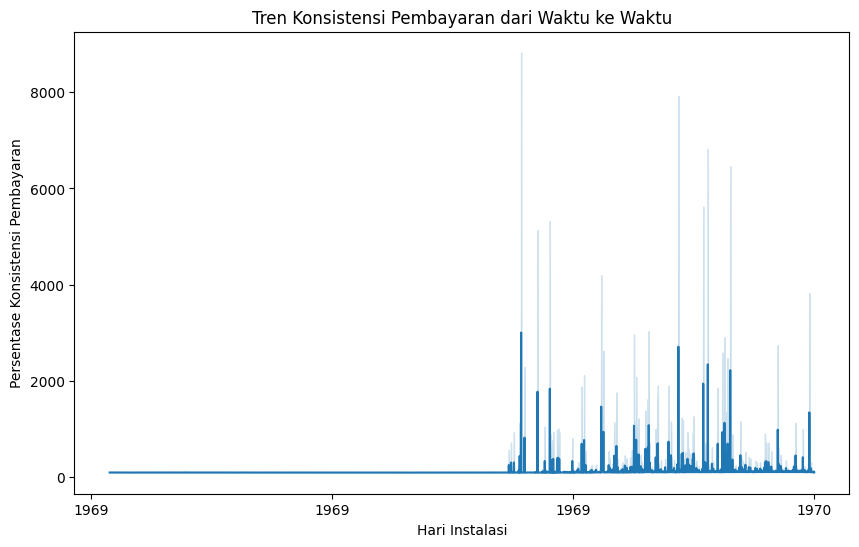

Rata-rata Persentase Konsistensi Pembayaran: inf%


In [16]:
# Visualisasi tren konsistensi pembayaran dari waktu ke waktu
plt.figure(figsize=(10, 6))
sns.lineplot(x='DAYS_INSTALMENT', y='CONSISTENCY_PERCENTAGE', data=installments_data)
plt.title('Tren Konsistensi Pembayaran dari Waktu ke Waktu')
plt.xlabel('Hari Instalasi')
plt.ylabel('Persentase Konsistensi Pembayaran')
plt.show()

# Hitung rata-rata persentase konsistensi pembayaran
average_consistency = installments_data['CONSISTENCY_PERCENTAGE'].mean()
print(f"Rata-rata Persentase Konsistensi Pembayaran: {average_consistency:.2f}%")

In [17]:
# Analisis faktor-faktor yang mempengaruhi perubahan versi kalender angsuran
factors_affecting_changes = installments_data.groupby('NUM_INSTALMENT_VERSION')['AMT_INSTALMENT'].mean()

print("Faktor-faktor yang Mempengaruhi Perubahan Versi Kalender Angsuran:")
print(factors_affecting_changes)

Faktor-faktor yang Mempengaruhi Perubahan Versi Kalender Angsuran:
NUM_INSTALMENT_VERSION
0.0        7956.111639
1.0       14913.402083
2.0       89514.544932
3.0       32771.015041
4.0       89093.422714
             ...      
61.0      23323.320000
68.0     346124.250000
72.0       7608.960000
73.0      36710.100000
178.0    347349.600000
Name: AMT_INSTALMENT, Length: 65, dtype: float64


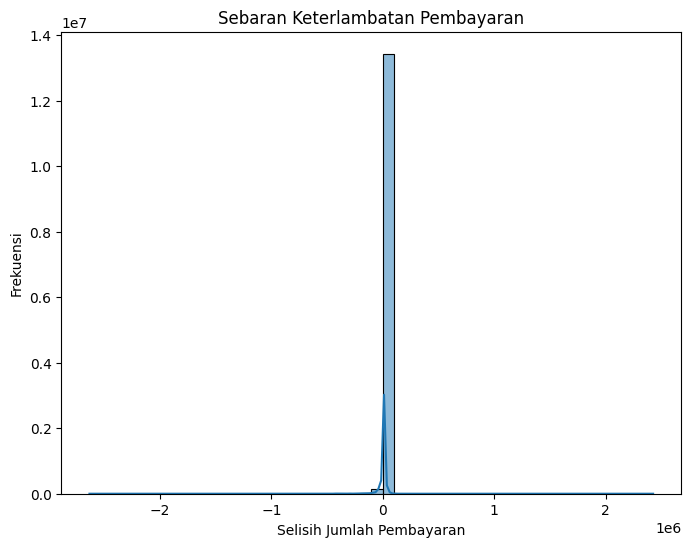

In [18]:
# Visualisasi sebaran keterlambatan pembayaran
plt.figure(figsize=(8, 6))
sns.histplot(installments_data['AMT_DIFF'], bins=50, kde=True)
plt.title('Sebaran Keterlambatan Pembayaran')
plt.xlabel('Selisih Jumlah Pembayaran')
plt.ylabel('Frekuensi')
plt.show()